# TITANIC Ejemplo el sabado Manuel

In [ ]:
Relacion entre genero, nivel de boleto y probbilidad de sobrevivir

In [1]:
#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#leo mis datos del archivo titanic train csv
titanic_train=pd.read_csv('titanictrain.csv')

In [3]:
#checar los encabezados
list(titanic_train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
titanic_train.head()
#survived es si sobrevivio o no. 0 es que murio, 1 es que sobrevivio
#sibsp es el num de hermnos o esposos dependientes del dueño del boleto
#parch es el parent or children dependientes del dueño del boleto
#embrk es el puerto en el que se subieron C= cherbourg S= southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#conviene usar el describe? no mucho
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## ¿Que ven de interesante?
- relacion entre nivel de boleto y suprevivencia
- relacion entre genero y suprevivencia
- relacion entre si ibn acompañados y suprevivencia
- relacion entre edaad y supervivencia
- puerto de embrque y supervivencia
- nivel de boleto vs genero
- nivel de boleto vs edd
- precio del boleto por clase y embarque

In [ ]:
#spot_filtr=spotify.filter(['acousticness','danceability','duration_ms',
#                           'energy','instrumentalness','liveness', 'loudness',
 #                          'speechiness','tempo','time_signature','valence','song_title','artist'],axis=1)

In [6]:
surv_clase=titanic_train[['Survived','Pclass']]  #importante!! ponerle doble [[ 'columna1', 'columna2' ]]
pd.DataFrame(surv_clase).head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [8]:
#relacion entre nivel de boleto y supervivencia
primera= sum(surv_clase['Pclass']==1)                 #checar las DOS FORMAS DIFERENTES DE SACAR LO MISMO
segunda=len(surv_clase[surv_clase['Pclass']==2]) 
tercera= sum(surv_clase['Pclass']==3)

muertos= sum(surv_clase['Survived']==0)
vivos= len(surv_clase[surv_clase['Survived']==1])

print('muertos '+ str(muertos))
print('vivos '+ str(vivos))
print('primera ' + str(primera))
print('segunda ' +str(segunda))
print('tercera '+ str(tercera))

muertos 549
vivos 342
primera 216
segunda 184
tercera 491


In [35]:
#surv_clase=surv_clase.set_index('Pclass')

In [9]:
surv_clase.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


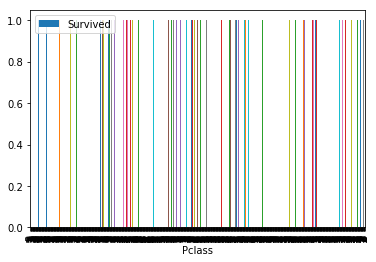

In [10]:
surv_clase.plot.bar(x='Pclass',y='Survived')
plt.show()

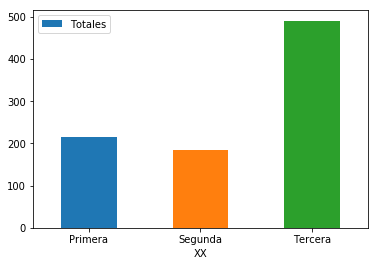

In [12]:
DS_porclase=pd.DataFrame({'XX':['Primera','Segunda','Tercera'],'Totales':[primera,segunda,tercera]})
DS_porclase.plot.bar(x='XX',y='Totales',rot=0)
plt.show()

In [13]:
DS_porclase.head()

,XX,Totales
0,Primera,216
1,Segunda,184
2,Tercera,491


In [ ]:
#train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [14]:
#ahora agrupamos por clase y supervivencia y lo ponemos en un DS llamado grupos por clase
gpos_xclase=titanic_train.groupby(['Pclass','Survived'])


In [16]:
#usamos .groups par que nos de el indice de los registros que caen en esa categoría
gpos_xclase.groups

{(1,
  0): Int64Index([  6,  27,  30,  34,  35,  54,  62,  64,  83,  92,  96, 102, 110,
             118, 124, 137, 139, 155, 168, 170, 174, 177, 185, 245, 252, 262,
             263, 270, 273, 284, 295, 297, 331, 332, 336, 339, 351, 373, 377,
             434, 438, 452, 456, 462, 467, 475, 487, 492, 493, 498, 505, 515,
             527, 536, 544, 545, 555, 557, 583, 602, 625, 633, 659, 662, 671,
             694, 698, 711, 741, 745, 748, 766, 782, 789, 793, 806, 815, 822,
             867, 872],
            dtype='int64'),
 (1, 1): Int64Index([  1,   3,  11,  23,  31,  52,  55,  61,  88,  97,
             ...
             842, 849, 853, 856, 857, 862, 871, 879, 887, 889],
            dtype='int64', length=136),
 (2,
  0): Int64Index([ 20,  33,  41,  70,  72,  99, 117, 120, 122, 134, 135, 144, 145,
             148, 149, 150, 178, 181, 191, 199, 213, 217, 219, 221, 228, 232,
             234, 236, 238, 239, 242, 249, 265, 277, 292, 308, 312, 314, 317,
             342, 343, 344, 357, 3

In [18]:
#gpos_xclase.get_group([1,1])   algo hace raro no me sale EDIT: AHHHHHH NO SON [] SON ()



In [20]:
#Tomo el grupo de primera que no murio
Primera_Vivos=gpos_xclase.get_group((1,1))
Primera_Muertos=gpos_xclase.get_group((1,0))

#imprimo el dataset Primera_vivo 
gpos_xclase.get_group((1,1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


In [21]:
#copiado_pegado del codigo con Manuel
#literal vamos construyendo el dataset de los grupos de vivosy muertos para poder hacer la grafica
#esto significa que primero armo el dataset con la sumatoria de cda grupo y lo almaceno en una celda
#que pertenece a una lista, por eso uso [y, dentro, cada, item, separado, por, comas]

Vivos= [len(gpos_xclase.get_group((1,1))),len(gpos_xclase.get_group((2,1))),len(gpos_xclase.get_group((3,1)))]
Muertos=[len(gpos_xclase.get_group((1,0))),len(gpos_xclase.get_group((2,0))),len(gpos_xclase.get_group((3,0)))]
#ojo este es importante
index=['Primera','Segunda','Tercera']
#literal armamos el dataset pieza por pieza, celda por celda
CVM=pd.DataFrame({'Vivos': Vivos,'Muertos': Muertos}, index=index)
#mostramos en pntalla
CVM

,Vivos,Muertos
Primera,136,80
Segunda,87,97
Tercera,119,372


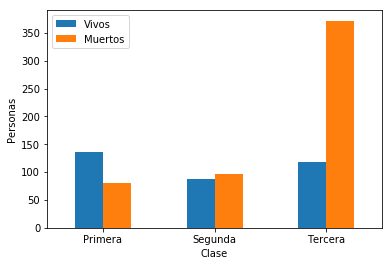

In [22]:
#hacemos la grafica
#EL INCIDE ES EL X, AL MOMETO DE GRAFICAR... ASI QUE DEBEMO CHECARBIEN QUE INDICE LE PONEMOS
CVM.plot.bar(rot=0)
plt.xlabel('Clase')
plt.ylabel('Personas')
plt.show()

In [25]:
#porcentajes de muertos

#primera y se murio
pp1M=len(gpos_xclase.get_group((1,0)))/primera
pp1V=len(gpos_xclase.get_group((1,1)))/primera
pp3M=len(gpos_xclase.get_group((3,0)))/tercera
pp3V=len(gpos_xclase.get_group((3,1)))/tercera


print(pp1M,pp1V)
print(pp3M,pp3V)

0.37037037037037035 0.6296296296296297
0.7576374745417516 0.24236252545824846


In [26]:
## Edad y precio 
#Checar bien que usualmente yo lo hago con el describe completo, y se puedehacer tmbien con una sola columna
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
#Veo todas las edades pero sin que se repitan
titanic_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

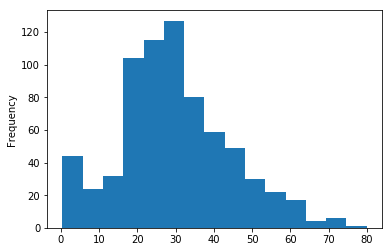

In [29]:
titanic_train['Age'].plot(kind='hist',bins=15)
plt.show()

In [31]:
#checo los que sobrevivieron por edad
AEdades=titanic_train.groupby('Survived')

AEdades.groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

In [34]:
tot_muertos=AEdades.get_group(0)

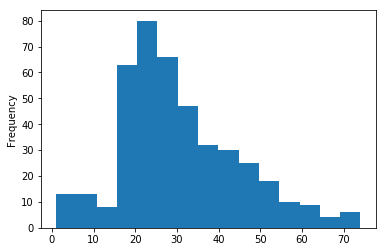

In [35]:
tot_muertos['Age'].plot(kind='hist',bins=15)
plt.show()

In [37]:
tot_muertos['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

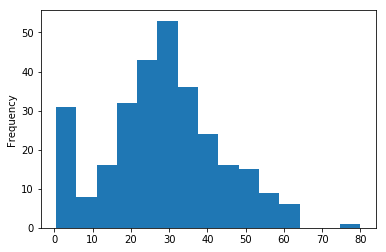

In [38]:
tot_vivos=AEdades.get_group(1)
#AEdades.get_group(0)
tot_vivos['Age'].plot(kind='hist',bins=15)
plt.show()

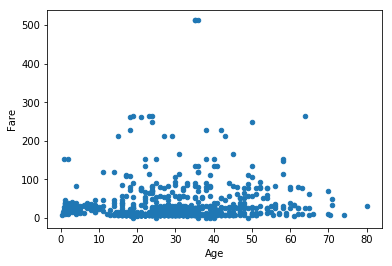

In [39]:
#ve la grfica de costo y año. a esos de treintitantos que le cobraron 500 dlls o libras, 
#se los chamaquearon jajaja espero hayan sobrevivido
titanic_train.plot.scatter('Age','Fare')
plt.show()



In [ ]:
#hasta aqui terminamos la clase.